In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel(r"C:\Users\USER\Downloads\iris (1).xls")


In [4]:
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [6]:
data.shape

(150, 5)

In [7]:
data['Classification'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Classification, dtype: int64

In [11]:
data['Classification'].value_counts(normalize=True)

Iris-setosa        0.333333
Iris-versicolor    0.333333
Iris-virginica     0.333333
Name: Classification, dtype: float64

In [12]:
data.dtypes

SL                float64
SW                float64
PL                float64
PW                float64
Classification     object
dtype: object

In [13]:
data = pd.get_dummies(data)

In [14]:
data.head()

,SL,SW,PL,PW,Classification_Iris-setosa,Classification_Iris-versicolor,Classification_Iris-virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,NaN,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0


In [53]:
data1 = data.drop('Classification_Iris-virginica', axis=1)
data1 = data.drop('Classification_Iris-versicolor', axis=1)
data1 = data.drop('SL', axis=1)

In [54]:
X = data1.drop('Classification_Iris-setosa', axis=1)
y = data1['Classification_Iris-setosa']
data.fillna(999, inplace=True)

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.25, random_state=42)

In [57]:
from sklearn.linear_model import LogisticRegression

In [58]:
lr = LogisticRegression()
model = lr.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [59]:
from sklearn.metrics import confusion_matrix

In [60]:
confusion_matrix(y_test,y_pred)

array([[23,  0],
       [ 0, 15]], dtype=int64)

In [61]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [64]:
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
print(f1_score(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

1.0
1.0
1.0
1.0


In [65]:
X_train.shape

(112, 5)

In [66]:
y_test.shape

(38,)

In [67]:
from sklearn.neighbors import KNeighborsClassifier

In [69]:
metric_k = []
neighbors = np.arange(3,15)

for k in neighbors :
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(X_train,y_train)
    y_pred = classifier.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    metric_k.append(acc)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

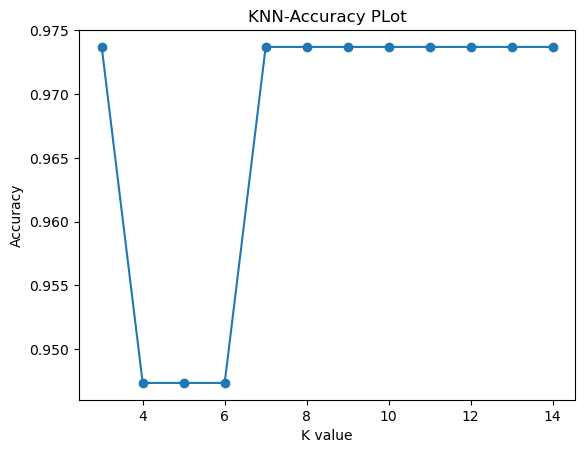

In [70]:
plt.plot(neighbors,metric_k, 'o-')
plt.title("KNN-Accuracy PLot")
plt.xlabel('K value')
plt.ylabel('Accuracy')
plt.show()

In [71]:
classifier = KNeighborsClassifier(n_neighbors=7)
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [72]:
accuracy_score(y_test, y_pred)

0.9736842105263158

In [73]:
confusion_matrix(y_test, y_pred)

array([[23,  0],
       [ 1, 14]], dtype=int64)

In [74]:
from sklearn.svm import SVC

In [75]:
svmclf = SVC(kernel='linear')

In [76]:
model = svmclf.fit(X_train, y_train)

In [78]:
y_pred = svmclf.predict(X_test)
accuracy_score(y_test,y_pred)

1.0

In [79]:
from sklearn.tree import DecisionTreeClassifier

In [80]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

In [81]:
accuracy_score(y_test,y_pred)

1.0

In [82]:
from sklearn.ensemble import RandomForestClassifier
rfclf = RandomForestClassifier()
rfclf.fit(X_train, y_train)
y_pred = rfclf.predict(X_test)
accuracy_score(y_test,y_pred)

1.0

In [83]:
print("All the Classification model is providing Same Accuracy.")
print("The Best Classifier is KNN")

All the Classification model is providing Same Accuracy.
The Best Classifier is KNN
